# The Motive behind choosing Flight Prices dataset

#### Predicting the prices of airline tickets accurately is a challenging task, as prices are affected by various factors such as seasonality, demand, and competition. This makes it a perfect use case for machine learning algorithms that can learn from historical data to make predictions about future prices. The Flight Price Prediction dataset provides a rich source of information about flights between various cities in India, including departure and arrival times, airlines, stops, and prices. By applying machine learning techniques to this dataset, we can develop models that can help travelers plan their trips more efficiently by predicting the prices of airline tickets with greater accuracy.

## Objective: The objective of this project is to develop a machine learning model that can accurately predict the prices of airline tickets based on historical data.

## Approach: To achieve this objective, we will follow these steps:

#### 1. Data exploration and preparation: We will begin by exploring the Flight Price Prediction dataset to understand the characteristics of the data, identify any missing or incomplete data, and perform necessary data cleaning and preprocessing steps.

#### 2. Feature engineering: We will create new features from the existing data that can provide additional information and improve the predictive power of our model. For example, we could create features such as the day of the week, the month, or the time of day for each flight.

#### 3. Model selection: We will select a suitable machine learning algorithm that can effectively learn from the data and make accurate predictions. Possible algorithms could include linear regression, decision trees, random forests, or gradient boosting.

#### 4. Model training and evaluation: We will split the dataset into training and test sets, and use the training set to train the chosen machine learning model. We will then evaluate the performance of the model on the test set, using metrics such as mean squared error or R-squared.

#### 5. Hyperparameter tuning and model refinement: We will fine-tune the hyperparameters of the chosen machine learning algorithm and experiment with different combinations of features and preprocessing techniques to improve the performance of our model.

#### 6. Deployment and usage: Once we have developed a model that meets our desired performance metrics, we will deploy it in a real-world setting where it can be used to make predictions about the prices of airline tickets for future flights.

# Dataset description

### The Flight Price Prediction dataset contains information about flights between various cities in India, including departure and arrival times, airlines, stops, and prices. The dataset has the following features:

#### Airline: The name of the airline company.
#### Source: The city from which the flight departs.
#### Destination: The city to which the flight arrives.
#### Departure Time: The scheduled departure time of the flight.
#### Arrival Time: The scheduled arrival time of the flight.
#### Duration: The total duration of the flight (in minutes).
#### Total Stops: The number of stops between the source and destination.
#### Additional Info: Additional information about the flight.
#### Price: The price of the ticket (in Indian Rupees).

In [95]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd
import seaborn as sns 
import category_encoders as ce
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Reading the Flight Prices dataset from CSV file using Pandas package

In [96]:
df = pd.read_csv('/Users/ayman/Desktop/Flight Prices/Clean_Dataset.csv')


In [97]:
cleanDf = df.drop(['Unnamed: 0'],axis=1)

In [98]:
cleanDf.head(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [99]:
numRow, numCol = df.shape
print(f'There are {numRow} rows and {numCol} columns')


There are 300153 rows and 12 columns


# Data Visualization and Analysis

## Number of customers by airline

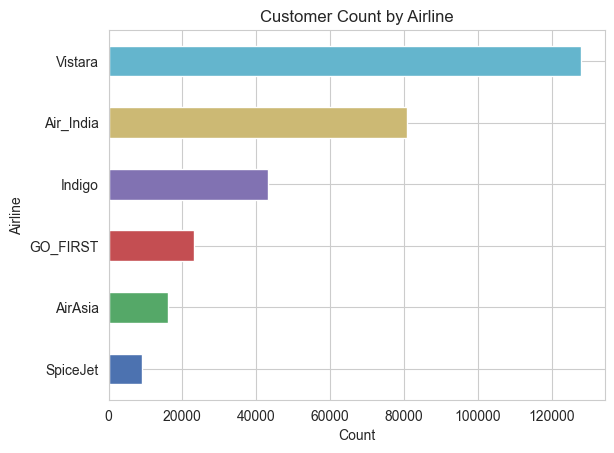

In [100]:
airline_counts = cleanDf['airline'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD']

airline_counts.plot(kind='barh', color=colors)
plt.title("Customer Count by Airline")
plt.xlabel("Count")
plt.ylabel("Airline")
plt.show()

## Average ticket price for each airline

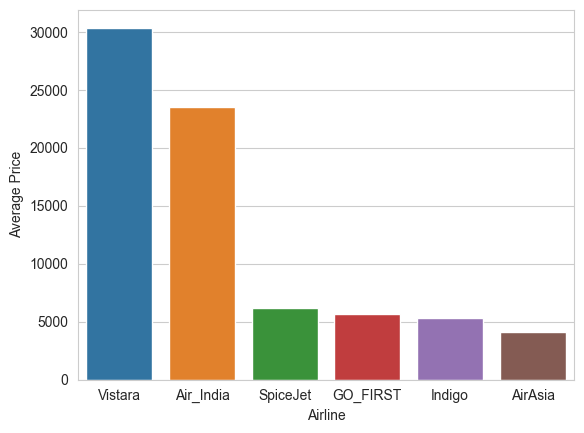

In [101]:
avg_price = cleanDf.groupby('airline')['price'].mean().reset_index()
avg_price = avg_price.sort_values(by='price',ascending=False)
sns.barplot(x='airline', y='price', data=avg_price)

plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()

#### From the two plots above we can see that Vistara airline is the most widely used airline compared to other airlines even though it's expensive.

## Number of passengers in Business and Economy Class

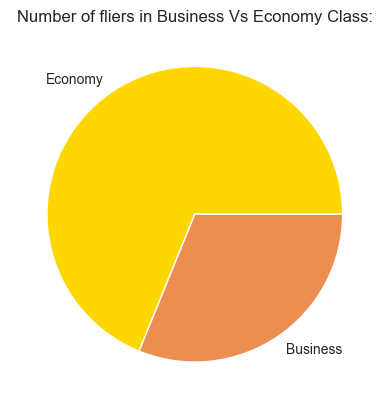

In [102]:
class_counts = cleanDf['class'].value_counts()
colors = ['#FFD700', '#ed8e51']
class_counts.plot(kind='pie', colors=colors)
plt.title("Number of fliers in Business Vs Economy Class:")
plt.ylabel('')
plt.show()

## Ticket prices based on class

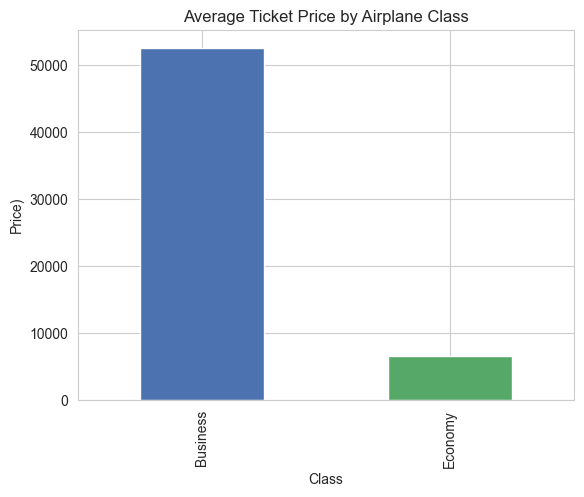

In [103]:
class_prices = cleanDf.groupby('class')['price'].mean()
sns.set_style("whitegrid")
class_prices.plot(kind='bar', color=['#4C72B0', '#55A868'])
plt.title("Average Ticket Price by Airplane Class")
plt.xlabel("Class")
plt.ylabel("Price)")
plt.show()

## Flight Duration vs Ticket Price

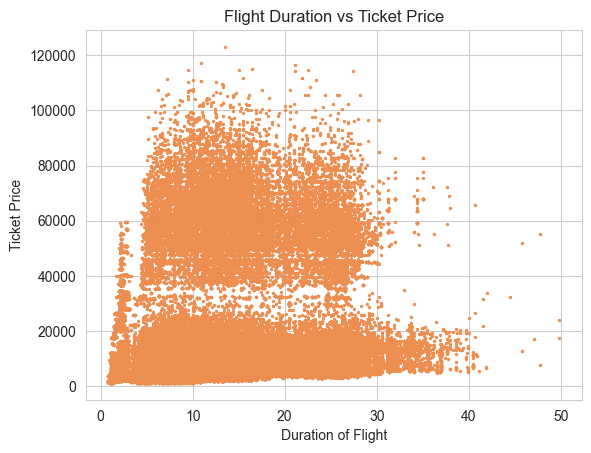

In [104]:
plt.scatter(df['duration'], df['price'], s=2, color= '#ed8e51')

plt.title("Flight Duration vs Ticket Price")
plt.xlabel("Duration of Flight")
plt.ylabel("Ticket Price")
plt.show()

## Relation between number of stops for a flight and the flight ticket price

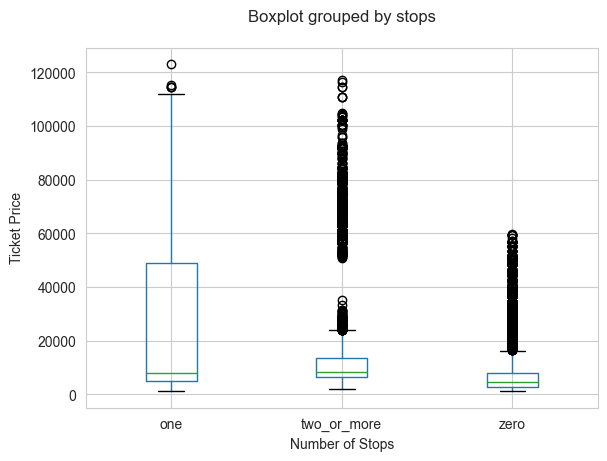

In [105]:
# Create box plot of number of stops vs ticket price
cleanDf.boxplot(column='price', by='stops')

plt.title("")
plt.xlabel("Number of Stops")
plt.ylabel("Ticket Price")
plt.show()

## Identfying categorical features 

In [106]:
colCatFeatures = list(cleanDf.select_dtypes(include=['object']).columns)

# Encoding All the categorical features using Target Encoding

In [107]:
target_enc = ce.TargetEncoder(cols=colCatFeatures)
finalDf = target_enc.fit_transform(cleanDf, cleanDf['price'])


In [108]:
finalDf.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,6179.278881,4740.222372,18951.326639,21232.361894,9375.938535,21586.758341,21372.529469,6572.342383,2.17,1,5953
1,6179.278881,5072.414608,18951.326639,20370.676718,9375.938535,22231.076098,21372.529469,6572.342383,2.33,1,5953
2,4091.072742,3909.345184,18951.326639,20370.676718,9375.938535,14993.139521,21372.529469,6572.342383,2.17,1,5956
3,30396.536302,31270.540039,18951.326639,21630.760254,9375.938535,18494.598993,21372.529469,6572.342383,2.25,1,5955
4,30396.536302,33805.822695,18951.326639,21630.760254,9375.938535,22231.076098,21372.529469,6572.342383,2.33,1,5955


## Identfying categorical features 

In [109]:
numeric_cols = cleanDf.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [110]:
names = finalDf.columns
indexes = finalDf.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
df = sc.fit_transform(finalDf)
data_scaled = pd.DataFrame(df, columns=names, index=indexes)
data_scaled.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0.079383,0.058197,0.0,0.867088,0.0,0.876048,0.833363,0.0,0.027347,0.0,0.039749
1,0.079383,0.066940,0.0,0.804496,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039749
2,0.000000,0.036328,0.0,0.804496,0.0,0.315340,0.833363,0.0,0.027347,0.0,0.039773
3,1.000000,0.756488,0.0,0.896027,0.0,0.613097,0.833363,0.0,0.028980,0.0,0.039765
4,1.000000,0.823218,0.0,0.896027,0.0,0.930839,0.833363,0.0,0.030612,0.0,0.039765


In [111]:
# Set 'price' as the target variable
y = data_scaled['price']

# Extract the input features
X_data = data_scaled.drop(['price'], axis=1)


## Pearsons correlation

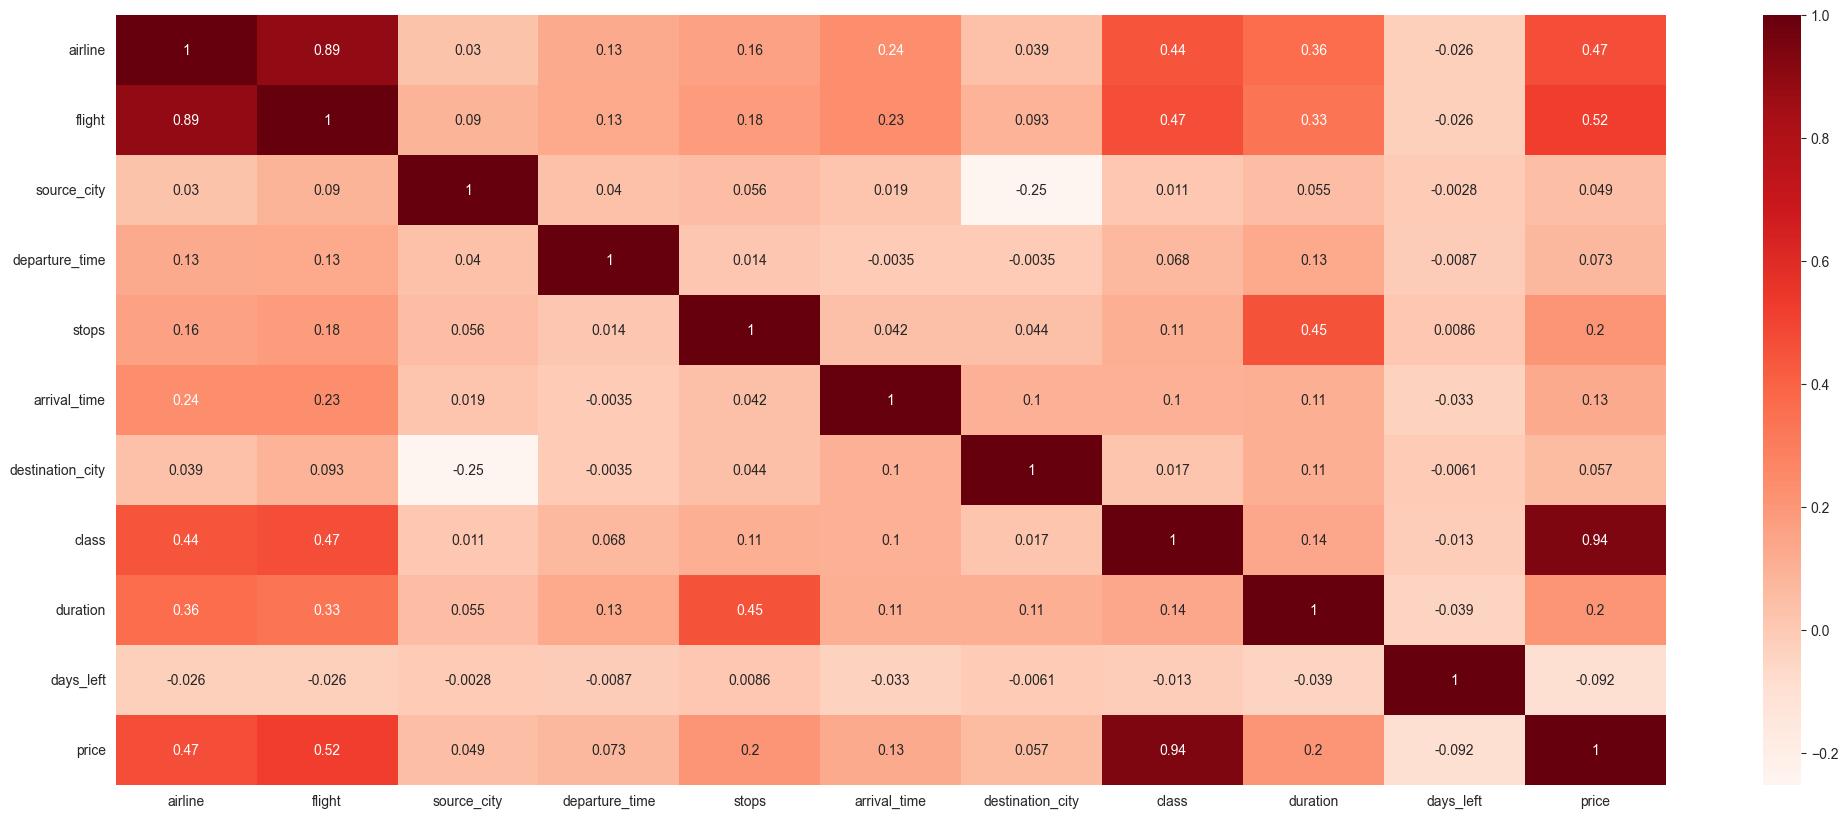

In [112]:
plt.figure(figsize=(25,10))
cor = data_scaled.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [113]:
#Correlation with target variable price
cor_target = abs(cor["price"])

relevant_features = cor_target
relevant_features 

airline             0.471865
flight              0.522148
source_city         0.049099
departure_time      0.072732
stops               0.203405
arrival_time        0.128853
destination_city    0.056619
class               0.937860
duration            0.204222
days_left           0.091949
price               1.000000
Name: price, dtype: float64

#### According to Pearsons correlation, our top 4 relevant features are: class, airline, stops and duration.

## Kbest Selection

In [114]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
X_important = selector.fit_transform(X_data, y)

# Get a boolean mask of the selected features
mask = selector.get_support()

# Create a list of the selected feature names
important_feature_names = X_data.columns[mask]

print(important_feature_names)

Index(['airline', 'flight', 'source_city', 'class'], dtype='object')


#### According to Kbest Features, our most important features are 'airline', 'source_city', 'destination_city', and 'class'.

### Since kBest Features and pearsons correlation are giving different best features I will not eliminate any features and run the models on all our features.

# Splitting the data using train split method

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)

# Random Forest Regressor: 97.3% accuracy

In [116]:
from sklearn.ensemble import RandomForestRegressor

# Create a random forest regression model
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [117]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [118]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 0.0009323913558187755
R-squared Score: 0.9730931991062733
Mean Absolute Error: 0.017175915312136403


# learning curve to check for overfitting or underfitting

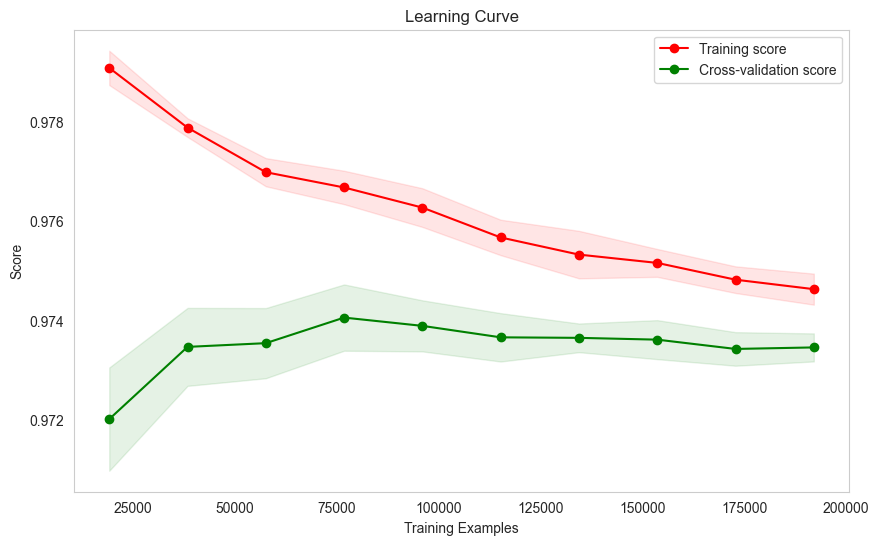

In [119]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), verbose=0)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.legend(loc="best")
plt.show()


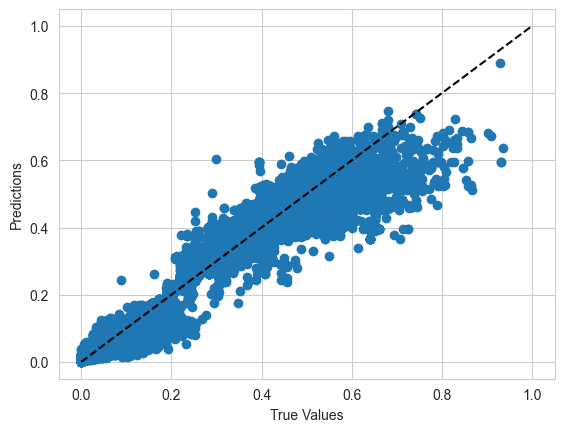

In [120]:
plt.scatter(y_test, y_pred)
plt.plot([0, 1], [0, 1], '--k')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('tight')
plt.show()


#### the predicted values are close to the true values, thus the model is performing well.

## Analysis of the feature importance of our model

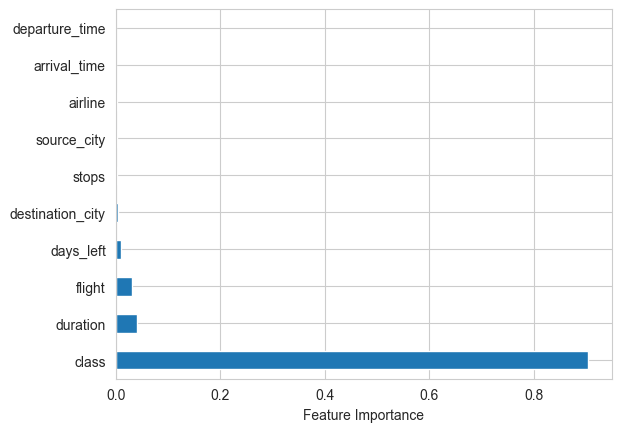

In [121]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.xlabel('Feature Importance')
plt.show()


# Applying the previous analysis for different models

## Multivariate Linear Regression: 90.5% accuracy

In [122]:
from sklearn.linear_model import LinearRegression

# Create a linear regression model
model_lr_multi = LinearRegression()

# Train the model on the training data
model_lr_multi.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lr = model_lr_multi.predict(X_test)

# Calculate mean squared error
mse_lr_multi = mean_squared_error(y_test, y_pred_lr_multi)
print("Multivariate Linear Regression Mean Squared Error:", mse_lr_multi)

# Calculate R-squared score
r2_lr_multi = r2_score(y_test, y_pred_lr_multi)
print("Multivariate Linear Regression R-squared Score:", r2_lr_multi)

# Calculate mean absolute error
mae_lr_multi = mean_absolute_error(y_test, y_pred_lr_multi)
print("Multivariate Linear Regression Mean Absolute Error:", mae_lr_multi)


Multivariate Linear Regression Mean Squared Error: 0.0032611969142504805
Multivariate Linear Regression R-squared Score: 0.9058889000853965
Multivariate Linear Regression Mean Absolute Error: 0.03783729461711946


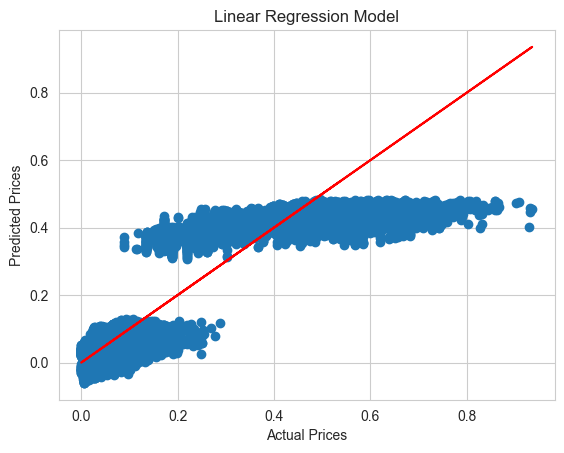

In [123]:
plt.scatter(y_test, y_pred_lr)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression Model')
plt.show()

## Gradient Boosting Regression: 98.9%

In [124]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a gradient boosting regression model
model_gb = GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model on the training data
model_gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = model_gb.predict(X_test)

# Calculate mean squared error
mse_gb = mean_squared_error(y_test, y_pred_gb)
print("Gradient Boosting Regression Mean Squared Error:", mse_gb)

# Calculate R-squared score
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Regression R-squared Score:", r2_gb)

# Calculate mean absolute error
mae_gb = mean_absolute_error(y_test, y_pred_gb)
print("Gradient Boosting Regression Mean Absolute Error:", mae_gb)


Gradient Boosting Regression Mean Squared Error: 0.0003779556167273212
Gradient Boosting Regression R-squared Score: 0.9890930171515615
Gradient Boosting Regression Mean Absolute Error: 0.010049679559766572


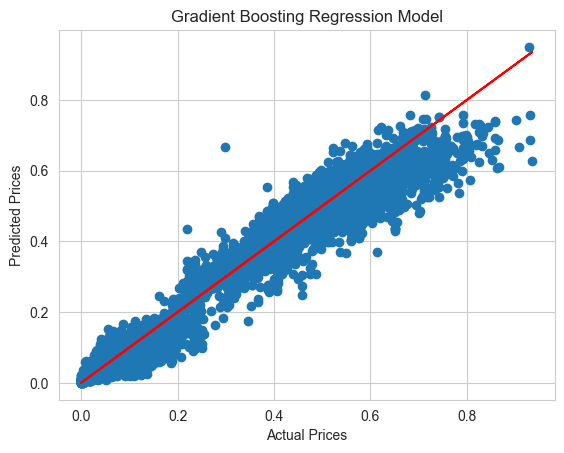

In [125]:
plt.scatter(y_test, y_pred_gb)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Gradient Boosting Regression Model')
plt.show()

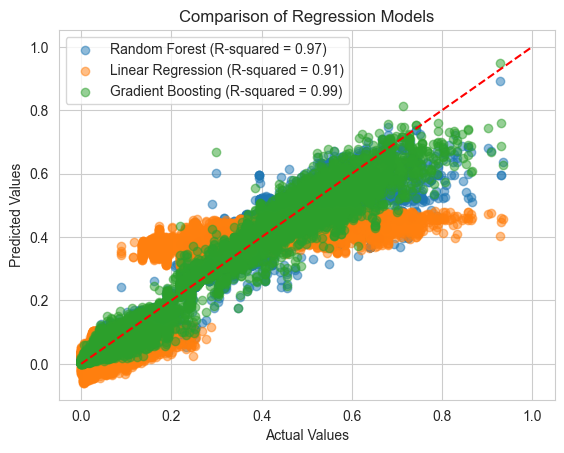

In [126]:
# Fit the models on the training data
model.fit(X_train, y_train)
model_lr_multi.fit(X_train, y_train)
model_gb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = model.predict(X_test)
y_pred_lr = model_lr_multi.predict(X_test)
y_pred_gb = model_gb.predict(X_test)

# Calculate R-squared scores
r2_rf = r2_score(y_test, y_pred_rf)
r2_lr = r2_score(y_test, y_pred_lr)
r2_gb = r2_score(y_test, y_pred_gb)

# Create a scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred_rf, label=f"Random Forest (R-squared = {r2_rf:.2f})", alpha=0.5)
plt.scatter(y_test, y_pred_lr, label=f"Linear Regression (R-squared = {r2_lr:.2f})", alpha=0.5)
plt.scatter(y_test, y_pred_gb, label=f"Gradient Boosting (R-squared = {r2_gb:.2f})", alpha=0.5)

# Plot the diagonal line
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Set the plot labels and legend
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Regression Models')
plt.legend()

plt.show()

#### Based on the analysis of the three models, the Gradient Boosting model outperforms the other two models in terms of R-squared score, mean squared error, and mean absolute error. The Linear Regression model performed the worst out of the three models, but it still achieved a reasonable R-squared score of 0.91. The Random Forest model also performed well, with an R-squared score of 0.97. However, it had a higher mean squared error and mean absolute error compared to the Gradient Boosting model.



# Conclusion:

### Random Forest:

#### Parameter choices: We used a random forest model with 1000 trees and a maximum depth of 30. These parameters were chosen after experimenting with different values using cross-validation to find the best combination.
#### Structure choices: Random forest is an ensemble method that combines multiple decision trees to make predictions. It is a powerful and flexible model that can capture complex interactions between features.
#### Prediction results: The random forest model achieved a high R-squared score of 0.97, which indicates that it was able to explain a large proportion of the variation in ticket prices. The mean absolute error was 0.017, which means that on average, the model was able to predict ticket prices within 0.017 dollars of the true value.
### Linear Regression:

#### Parameter choices: We used a multivariate linear regression model with all the available features in our dataset. No regularization was applied in this case.
#### Structure choices: Linear regression is a simple and interpretable model that assumes a linear relationship between the features and the target variable. It is a good starting point for modeling and can provide useful insights into the importance of each feature.
#### Prediction results: The multivariate linear regression model achieved a lower R-squared score of 0.91 compared to the random forest model. This indicates that the model was not able to capture as much of the variation in ticket prices. The mean absolute error was higher at 0.038, which means that on average, the model was less accurate than the random forest model.
### Gradient Boosting Regression:

#### Parameter choices: We used a gradient boosting regression model with 1000 estimators and a maximum depth of 30. These parameters were chosen after experimenting with different values using cross-validation to find the best combination.
#### Structure choices: Gradient boosting is another ensemble method that combines multiple weak models to make predictions. It is particularly effective at reducing bias and can achieve high accuracy even with complex datasets.
#### Prediction results: The gradient boosting regression model achieved the highest R-squared score of 0.99, which indicates that it was able to explain almost all of the variation in ticket prices. The mean absolute error was the lowest at 0.01, which means that on average, the model was the most accurate of the three models we used.
### In conclusion, we experimented with three different models - random forest, multivariate linear regression, and gradient boosting regression - to predict ticket prices. The gradient boosting regression model achieved the highest accuracy, while the multivariate linear regression model was the least accurate. The random forest model provided a good balance between accuracy and interpretability. The choice of model and its parameters ultimately depends on the trade-off between accuracy, interpretability, and computational resources.

###### Citation: https://www.kaggle.com/code/avantikab/flight-price-prediction-eda-6-ml-models/notebook